# Importing the Libraries that will be used in this Notebook.


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import Fun_Test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Photo shape :  (480, 852, 3)


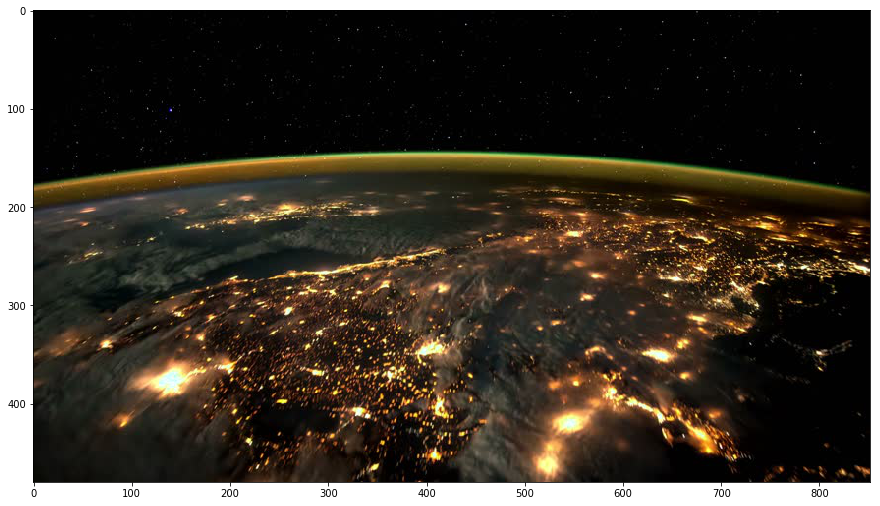

In [2]:
%matplotlib inline
from scipy import misc
ph=misc.imread('./Earth2.jpg')
plt.figure(figsize=(15,10))
plt.imshow(ph)
print("Photo shape : ",ph.shape)
t_row , t_col , t_layers =ph.shape


# Here, we provide mask operation at considered image file

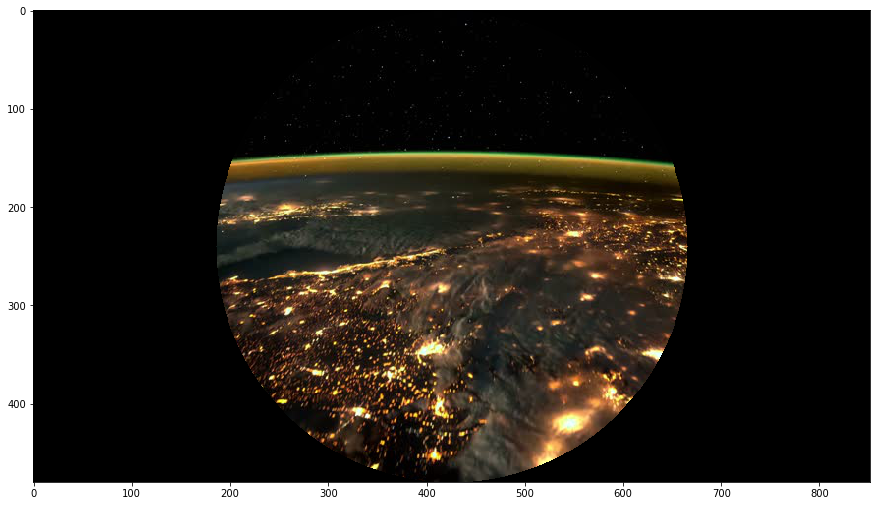

In [3]:
x,y=np.ogrid[:t_row, :t_col]
c_row , c_col = t_row/2 , t_col/2
dfc=(x-c_row)**2 +(y-c_col)**2
vv=(t_row/2)**2
dfc=(x-c_row)**2 +(y-c_col)**2
vv=(t_row/2)**2
cmask=(dfc>vv)
ph[cmask]=0
plt.figure(figsize=(15,10))
plt.imshow(ph)

# The image is first load using opencv2 and check for the tranformation

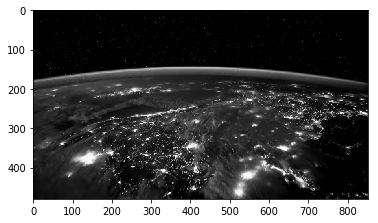

In [4]:
I = cv2.imread('Earth2.jpg',0)
plt.imshow(I,cmap='gray')
plt.show()

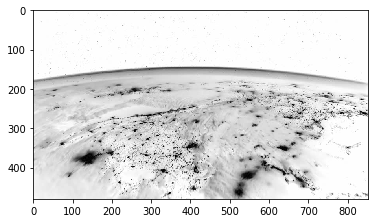

In [5]:
img_1 = Fun_Test.neg_tf(I)
plt.imshow(img_1,cmap='gray')
plt.show()

# Testing log transformation

The log tranformation if best viewed in the range of fft components of the image
The fft of the image is first computed and compared against the log transformation

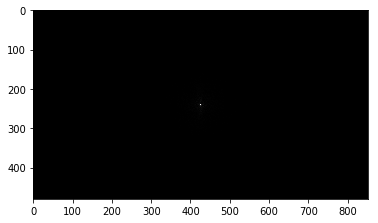

In [6]:
# FFT image
f = np.fft.fft2(I)
fshift = np.fft.fftshift(f)

# FFT is increased by log function (standard)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# FFT image
plt.imshow(np.abs(fshift),cmap="gray")
plt.show()

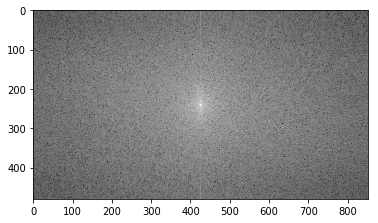

In [7]:
# Class assign
I_log = Fun_Test.log_transform(fshift)
plt.imshow(np.abs(I_log),cmap="gray")
plt.show()

# Testing for gamma correction

In this part of the script the gamma correction is tested.
A different image is loaded 


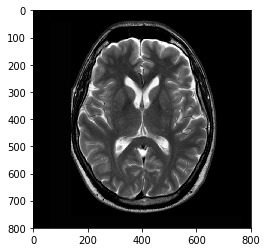

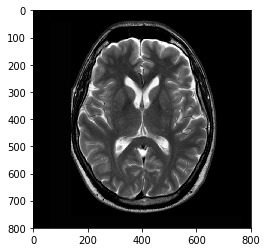

In [9]:
# Load image
mri_img = cv2.imread('Brain_MRI.jpg',0)

plt.imshow(mri_img,cmap="gray")
plt.show()

# Class call
gamma_cor = Fun_Test.power_tf(mri_img)
plt.imshow(gamma_cor,cmap="gray")
plt.show()



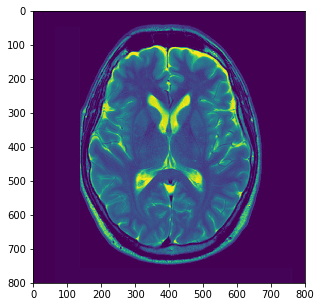

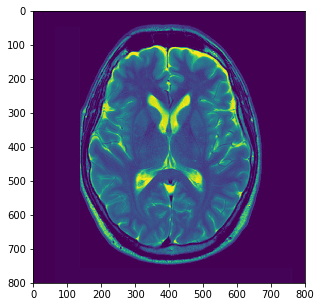

In [10]:
plt.figure(figsize=(10,5))
plt.imshow(mri_img)

plt.figure(figsize=(10,5))
plt.imshow(gamma_cor)

# Testing histogram equilizer 

This part of script is for testing the histogram equilizer

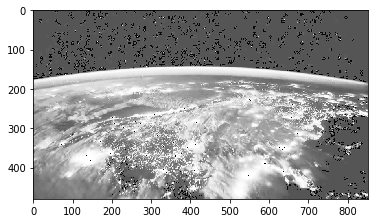

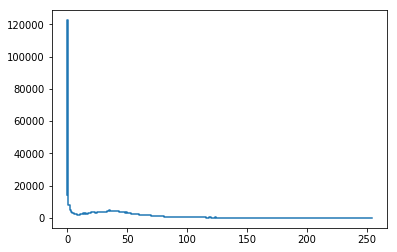

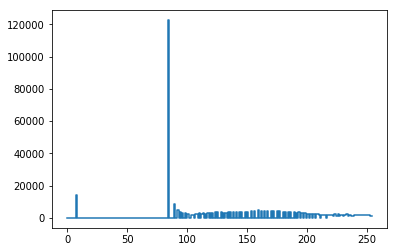

In [12]:
# Use previous image
I_hist = Fun_Test.hist_eq(I)
plt.imshow(I_hist,cmap="gray")
plt.show()

# Histogram plot
plt.step(range(0,255,1),Fun_Test.hist_data(I))
plt.show()
plt.step(range(0,255,1),Fun_Test.hist_data(I_hist))
plt.show()
